# I.  Project Overview

<center><img src="resources/preview.jpg" width="700"></center>

In this project, we'll build a neural network classifier that determines: **MUFFIN... or CHIHUAHUA!**

This is what we'll cover in the tutorial:
#### 1) Build the neural network
#### 2) Load the data
#### 3) Train the model on the data
#### 4) Visualize the results

### Remember: This is an INTERACTIVE Notebook!
You should run and play with the code as you go to see how it works. Select a cell and **press shift-enter to execute code.**

<img src="resources/jupyter_animated.gif" width="700">

# II.  Deep Learning Tutorial

Let's get to the fun stuff!



<center><img src="resources/Pytorch_logo.png" width="700"></center>

**Generic Python imports** (select the below cell and press shift-enter to execute it)

In [1]:
!pip install torch torchvision torchaudio

import zipfile
zip_file_path = "workshop-chihuahua-vs-muffin-master.zip"
output_directory = "unzipped_files"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)
    
import matplotlib.pyplot as plt  # graphical library, to plot images
# special Jupyter notebook command to show plots inline instead of in a new window
%matplotlib inline

**Deep learning imports**

In [2]:
import torch                                            # PyTorch deep learning framework
from torchvision import datasets, models, transforms    # extension to PyTorch for dataset management
import torch.nn as nn                                   # neural networks module of PyTorch, to let us define neural network layers
from torch.nn import functional as F                    # special functions
import torch.optim as optim                             # optimizers

## (1) Build our Neural Network

Recall from the lesson that a neural network generally looks like this. Input is on the left, output is on the right. The number of output neurons correspond to the number of classes.

<img src="resources/what_is_nn_slide.jpg" width="700">

So let's define a similar architecture for our 2-class muffin-vs-chihuahua classifier:

In [3]:
#define image height and width
input_height = 224
input_width = 224

# Here I define a more advanced architecture (ResNet)
class MyAdvancedSkynet(nn.Module):
    def __init__(self, num_classes=2):
        super(MyAdvancedSkynet, self).__init__()
        # Load pretrained ResNet model
        self.resnet = models.resnet18(pretrained=True)
        # Freeze the parameters so we don't backpropagate through them
        for param in self.resnet.parameters():
            param.requires_grad = False
        # Replace the last fully connected layer to adapt to our classification task
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

Now that we've defined the network above, let's initialize it. If available, we'll place the network on the GPU; if not, it goes on the CPU.

In [4]:
# Here I degine the new model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyAdvancedSkynet().to(device)
model

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MyAdvancedSkynet(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

In [5]:
# Here we define new hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 10

Essentially, our network looks like this:
<img src="resources/architecture.png" width="600">

## (2) Data and Data Loading

### Separate "train" and "test" datasets

Recall from the below slide, we should make two separate datasets to train and test our model. That way, we know our model learns more than rote memorization.

<center><img src="resources/when_is_your_model_ready_slide.jpg" width="600"></center>

### Inspect our data
Let's look in our data folder to see what's there. As you can see, the folder is **split into "train" for training**, and **"validation" for testing** (to validate our model).

In [6]:
import os  # interact with the os. in our case, we want to view the file system

print("Data contents:", os.listdir("data"))
print("Train contents:", os.listdir("data/train"))
print("Validation contents:", os.listdir("data/validation"))

Data contents: ['train', 'validation']
Train contents: ['chihuahua', 'muffin']
Validation contents: ['chihuahua', 'muffin']


Let's also look at some of the images:

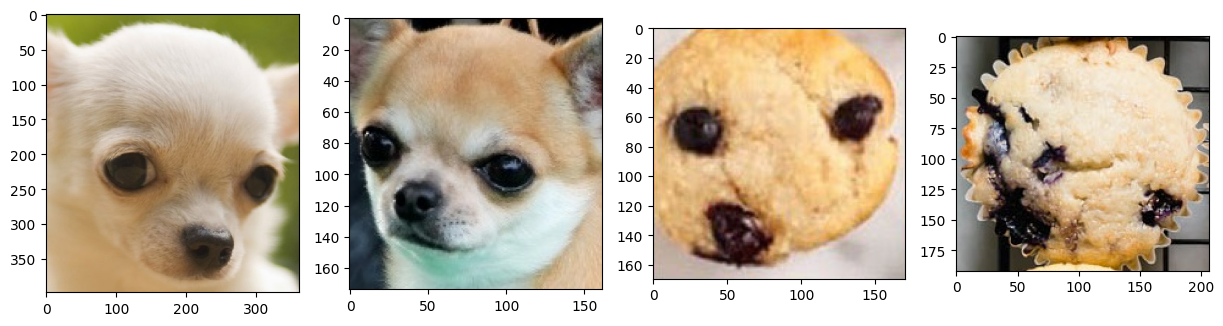

In [7]:
from PIL import Image  # import our image opening tool

_, ax = plt.subplots(1, 4, figsize=(15,60))  # to show 4 images side by side, make a "1 row x 4 column" axes
ax[0].imshow(Image.open("data/train/chihuahua/4.jpg"))  # show the chihuahua in the first column
ax[1].imshow(Image.open("data/train/chihuahua/5.jpg"))  # show the chihuahua in the second column
ax[2].imshow(Image.open("data/train/muffin/131.jpg"))   # show the muffin in the third column
ax[3].imshow(Image.open("data/train/muffin/107.jpg"))   # show the muffin in the fourth column


If you look in the data folder on your computer, there are 120 train images and 30 validation. So our data is split like this:

<img src="resources/folders.png" width="600">

### Load our data

That's great that we have data! But we have to load all the images and convert them into a form that our neural network understands. Specifically, PyTorch works with **Tensor** objects. (A tensor is just a multidimensional matrix, i.e. an N-d array.)

<img src="resources/image_to_tensor.jpg" width="550">


**To easily convert our image data into tensors, we use the help of a "dataloader."** The dataloader packages data into convenient boxes for our model to use. You can think of it like one person passing boxes (tensors) to another.
<img src="resources/dataloader_box_analogy.jpg" width="400">

**First, we define some "transforms" to convert images to tensors.** We must do so for both our train and validation datasets.

For more information about transforms, check out the link here: https://pytorch.org/docs/stable/torchvision/transforms.html

In [8]:
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.5, 0.5, 0.5])
# Here I define a new data transforms with data augmentation
train_transforms = transforms.Compose([
    transforms.Resize((input_height, input_width)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    normalize
])

# these validation transforms are exactly the same as our train transforms
validation_transforms = transforms.Compose([
    transforms.Resize((input_height,input_width)),
    transforms.ToTensor(),
    normalize
])

print("Train transforms:", train_transforms)


Train transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


**Second, we create the datasets, by passing the transforms into the ImageFolder constructor.**

These just represent the folders that hold the images.

In [9]:
# insert respective transforms to replace ?
image_datasets = {
    'train':
        datasets.ImageFolder('data/train', train_transforms),
    'validation':
        datasets.ImageFolder('data/validation', validation_transforms)}


print("==Train Dataset==\n", image_datasets["train"])
print()
print("==Validation Dataset==\n", image_datasets["train"])


==Train Dataset==
 Dataset ImageFolder
    Number of datapoints: 120
    Root location: data/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

==Validation Dataset==
 Dataset ImageFolder
    Number of datapoints: 120
    Root location: data/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ColorJitt

**And finally, form dataloaders from the datasets:**

In [10]:
# define batch size, number of images to load in at once

# Defined new DataLoader instances with updated batch sizes
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True),
    'validation': torch.utils.data.DataLoader(image_datasets['validation'], batch_size=batch_size, shuffle=False)
}


print("Train loader:", dataloaders["train"])
print("Validation loader:", dataloaders["validation"])


Train loader: <torch.utils.data.dataloader.DataLoader object at 0x7feb22aeed00>
Validation loader: <torch.utils.data.dataloader.DataLoader object at 0x7feb22aeef40>


We can see a dataloader outputs 2 things: a BIG tensor to represent an image, and a vector to represent the labels (0 or 1).

In [11]:
next(iter(dataloaders["train"]))

[tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],
 
          [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],
 
          [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-

## (4) Train the model!

Hurray! We've built a neural network and have data to give it. Now we **repeatedly iterate over the data to train the model.**

Every time the network gets a new example, it looks something like this. Note the **forward pass** and the corresponding **backward pass**.

<img src="resources/backpropagation.gif" width="700">

### Define the train loop

We want the network to learn from every example in our training dataset. However, the best performance comes from more practice. Therefore, we **run through our dataset for multiple *epochs*.**

After each epoch, we'll check how our model performs on the validation set to monitor its progress.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Training loop with dropout for regularization
def train_model(model, dataloaders, loss_function, optimizer, num_epochs):
    """
    Trains a model using the given loss function and optimizer, for a certain number of epochs.
    
    model: a PyTorch neural network
    loss_function: a mathematical function that compares predictions and labels to return an error
    num_epochs: the number of times to run through the full training dataset
    """
    # Use tqdm for progress visualization
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('----------------')

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval() 

            running_loss = 0.0
            running_corrects = 0
            all_labels = []
            all_preds = []

            # Use tqdm instead of tqdm_notebook for compatibility
            with tqdm(total=len(dataloaders[phase]), desc=phase, unit="batch", leave=False) as pbar:
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        loss = loss_function(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    _, preds = torch.max(outputs, 1)
                    running_corrects += torch.sum(preds == labels.data)
                    
                    all_labels.extend(labels.cpu().numpy())
                    all_preds.extend(preds.cpu().numpy())


                    pbar.update(1)  # Update progress bar

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            # print(f'{phase} error: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
            
             # Calculate evaluation metrics
            accuracy = accuracy_score(all_labels, all_preds)
            precision = precision_score(all_labels, all_preds)
            recall = recall_score(all_labels, all_preds)
            f1 = f1_score(all_labels, all_preds)
            
            print(f'{phase} error: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
            print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')


In [13]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Use Adam optimizer with a learning rate of 0.001

#loss_function = nn.CrossEntropyLoss()              # the most common error function in deep learning
#optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent, with a learning rate of 0.1

### Loss function and optimizer

One last thing: we must define a function that gives feedback for how well the model performs. This is the **loss**, or "error" **function**, that compares model predictions to the true labels.

Once we calculate the error, we also need to define how the model should react to that feedback. **The optimizer determines how the network learns from feedback.**

In [14]:
# Train the model
train_model(model, dataloaders, criterion, optimizer, num_epochs=1000)

Epoch 1/1000
----------------


train error: 0.5672, Accuracy: 0.7250
Accuracy: 0.7250, Precision: 0.7037, Recall: 0.6909, F1-score: 0.6972


validation error: 0.3474, Accuracy: 0.9333
Accuracy: 0.9333, Precision: 1.0000, Recall: 0.8462, F1-score: 0.9167
Epoch 2/1000
----------------


train error: 0.3777, Accuracy: 0.9083
Accuracy: 0.9083, Precision: 0.9583, Recall: 0.8364, F1-score: 0.8932


validation error: 0.2159, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 3/1000
----------------


train error: 0.2401, Accuracy: 0.9583
Accuracy: 0.9583, Precision: 0.9630, Recall: 0.9455, F1-score: 0.9541


validation error: 0.1421, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 4/1000
----------------


train error: 0.1749, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0999, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 5/1000
----------------


train error: 0.1455, Accuracy: 0.9750
Accuracy: 0.9750, Precision: 0.9815, Recall: 0.9636, F1-score: 0.9725


validation error: 0.0802, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 6/1000
----------------


train error: 0.1058, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0566, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 7/1000
----------------


train error: 0.0746, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0459, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 8/1000
----------------


train error: 0.0676, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0380, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 9/1000
----------------


train error: 0.0720, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0339, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 10/1000
----------------


train error: 0.0600, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0291, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 11/1000
----------------


train error: 0.0500, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0262, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 12/1000
----------------


train error: 0.0657, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0232, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 13/1000
----------------


train error: 0.0372, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0218, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 14/1000
----------------


train error: 0.0365, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0201, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 15/1000
----------------


train error: 0.0673, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 0.9818, Recall: 0.9818, F1-score: 0.9818


validation error: 0.0185, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 16/1000
----------------


train error: 0.0387, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0158, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 17/1000
----------------


train error: 0.0372, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0148, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 18/1000
----------------


train error: 0.0286, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0141, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 19/1000
----------------


train error: 0.0342, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0137, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 20/1000
----------------


train error: 0.0257, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0131, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 21/1000
----------------


train error: 0.0262, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0131, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 22/1000
----------------


train error: 0.0411, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0126, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 23/1000
----------------


train error: 0.0220, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0110, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 24/1000
----------------


train error: 0.0253, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0102, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 25/1000
----------------


train error: 0.0342, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0097, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 26/1000
----------------


train error: 0.0380, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0091, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 27/1000
----------------


train error: 0.0205, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0090, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 28/1000
----------------


train error: 0.0228, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0089, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 29/1000
----------------


train error: 0.0152, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0088, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 30/1000
----------------


train error: 0.0448, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 0.9818, Recall: 0.9818, F1-score: 0.9818


validation error: 0.0076, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 31/1000
----------------


train error: 0.0139, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0075, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 32/1000
----------------


train error: 0.0168, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0072, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 33/1000
----------------


train error: 0.0190, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0069, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 34/1000
----------------


train error: 0.0184, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0064, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 35/1000
----------------


train error: 0.0644, Accuracy: 0.9750
Accuracy: 0.9750, Precision: 0.9643, Recall: 0.9818, F1-score: 0.9730


validation error: 0.0060, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 36/1000
----------------


train error: 0.0389, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0056, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 37/1000
----------------


train error: 0.0452, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0064, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 38/1000
----------------


train error: 0.0262, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0055, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 39/1000
----------------


train error: 0.0165, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0051, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 40/1000
----------------


train error: 0.0229, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0049, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 41/1000
----------------


train error: 0.0105, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0048, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 42/1000
----------------


train error: 0.0204, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0047, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 43/1000
----------------


train error: 0.0227, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0048, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 44/1000
----------------


train error: 0.0105, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0048, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 45/1000
----------------


train error: 0.0150, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0051, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 46/1000
----------------


train error: 0.0736, Accuracy: 0.9667
Accuracy: 0.9667, Precision: 0.9811, Recall: 0.9455, F1-score: 0.9630


validation error: 0.0049, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 47/1000
----------------


train error: 0.0179, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0057, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 48/1000
----------------


train error: 0.0114, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0050, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 49/1000
----------------


train error: 0.0128, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0042, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 50/1000
----------------


train error: 0.0137, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0034, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 51/1000
----------------


train error: 0.0212, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0033, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 52/1000
----------------


train error: 0.0075, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0032, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 53/1000
----------------


train error: 0.0078, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0032, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 54/1000
----------------


train error: 0.0302, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0030, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 55/1000
----------------


train error: 0.0080, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0030, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 56/1000
----------------


train error: 0.0627, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0042, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 57/1000
----------------


train error: 0.0128, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0045, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 58/1000
----------------


train error: 0.0102, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0033, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 59/1000
----------------


train error: 0.0100, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0028, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 60/1000
----------------


train error: 0.0077, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0026, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 61/1000
----------------


train error: 0.0092, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0025, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 62/1000
----------------


train error: 0.0060, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 63/1000
----------------


train error: 0.0103, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0026, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 64/1000
----------------


train error: 0.0083, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 65/1000
----------------


train error: 0.0156, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 66/1000
----------------


train error: 0.0080, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 67/1000
----------------


train error: 0.0063, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0022, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 68/1000
----------------


train error: 0.0127, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 69/1000
----------------


train error: 0.0076, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 70/1000
----------------


train error: 0.0139, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 71/1000
----------------


train error: 0.0046, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 72/1000
----------------


train error: 0.0103, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 73/1000
----------------


train error: 0.0049, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 74/1000
----------------


train error: 0.0143, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 75/1000
----------------


train error: 0.0110, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 76/1000
----------------


train error: 0.0068, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 77/1000
----------------


train error: 0.0041, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 78/1000
----------------


train error: 0.0065, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 79/1000
----------------


train error: 0.0262, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 80/1000
----------------


train error: 0.0056, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 81/1000
----------------


train error: 0.0137, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 82/1000
----------------


train error: 0.0061, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 83/1000
----------------


train error: 0.0065, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 84/1000
----------------


train error: 0.0106, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 85/1000
----------------


train error: 0.0146, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 86/1000
----------------


train error: 0.0128, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 87/1000
----------------


train error: 0.0048, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 88/1000
----------------


train error: 0.0117, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 89/1000
----------------


train error: 0.0063, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 90/1000
----------------


train error: 0.0155, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 91/1000
----------------


train error: 0.0042, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 92/1000
----------------


train error: 0.0067, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 93/1000
----------------


train error: 0.0046, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0022, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 94/1000
----------------


train error: 0.0153, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 95/1000
----------------


train error: 0.0068, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 96/1000
----------------


train error: 0.0196, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 97/1000
----------------


train error: 0.0158, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 98/1000
----------------


train error: 0.0104, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 99/1000
----------------


train error: 0.0057, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 100/1000
----------------


train error: 0.0296, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 0.9818, Recall: 0.9818, F1-score: 0.9818


validation error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 101/1000
----------------


train error: 0.0060, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 102/1000
----------------


train error: 0.0155, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 103/1000
----------------


train error: 0.0033, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 104/1000
----------------


train error: 0.0122, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 105/1000
----------------


train error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 106/1000
----------------


train error: 0.0145, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 107/1000
----------------


train error: 0.0058, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 108/1000
----------------


train error: 0.0380, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 109/1000
----------------


train error: 0.0055, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 110/1000
----------------


train error: 0.0062, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 111/1000
----------------


train error: 0.0093, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 112/1000
----------------


train error: 0.0075, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 113/1000
----------------


train error: 0.0063, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 114/1000
----------------


train error: 0.0035, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 115/1000
----------------


train error: 0.0083, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 116/1000
----------------


train error: 0.0098, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 117/1000
----------------


train error: 0.0031, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 118/1000
----------------


train error: 0.0028, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 119/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 120/1000
----------------


train error: 0.0123, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 121/1000
----------------


train error: 0.0089, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 122/1000
----------------


train error: 0.0038, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 123/1000
----------------


train error: 0.0059, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 124/1000
----------------


train error: 0.0146, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 125/1000
----------------


train error: 0.0030, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 126/1000
----------------


train error: 0.0052, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 127/1000
----------------


train error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 128/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 129/1000
----------------


train error: 0.0087, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 130/1000
----------------


train error: 0.0127, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 131/1000
----------------


train error: 0.0055, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 132/1000
----------------


train error: 0.0319, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 133/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 134/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 135/1000
----------------


train error: 0.0082, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 136/1000
----------------


train error: 0.0051, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 137/1000
----------------


train error: 0.0084, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 138/1000
----------------


train error: 0.0058, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 139/1000
----------------


train error: 0.0037, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 140/1000
----------------


train error: 0.0117, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 141/1000
----------------


train error: 0.0032, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 142/1000
----------------


train error: 0.0037, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 143/1000
----------------


train error: 0.0055, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 144/1000
----------------


train error: 0.0067, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 145/1000
----------------


train error: 0.0047, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 146/1000
----------------


train error: 0.0118, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 147/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 148/1000
----------------


train error: 0.0031, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 149/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 150/1000
----------------


train error: 0.0047, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 151/1000
----------------


train error: 0.0043, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 152/1000
----------------


train error: 0.0061, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 153/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 154/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 155/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 156/1000
----------------


train error: 0.0068, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 157/1000
----------------


train error: 0.0041, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 158/1000
----------------


train error: 0.0192, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 159/1000
----------------


train error: 0.0050, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 160/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 161/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 162/1000
----------------


train error: 0.0663, Accuracy: 0.9750
Accuracy: 0.9750, Precision: 0.9483, Recall: 1.0000, F1-score: 0.9735


validation error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 163/1000
----------------


train error: 0.0082, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 164/1000
----------------


train error: 0.0092, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 165/1000
----------------


train error: 0.0230, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0036, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 166/1000
----------------


train error: 0.0575, Accuracy: 0.9667
Accuracy: 0.9667, Precision: 1.0000, Recall: 0.9273, F1-score: 0.9623


validation error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 167/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 168/1000
----------------


train error: 0.0093, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 169/1000
----------------


train error: 0.0040, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0026, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 170/1000
----------------


train error: 0.0404, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 0.9649, Recall: 1.0000, F1-score: 0.9821


validation error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 171/1000
----------------


train error: 0.0575, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 0.9649, Recall: 1.0000, F1-score: 0.9821


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 172/1000
----------------


train error: 0.0078, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 173/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 174/1000
----------------


train error: 0.0061, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 175/1000
----------------


train error: 0.0096, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 176/1000
----------------


train error: 0.0051, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 177/1000
----------------


train error: 0.0036, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 178/1000
----------------


train error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 179/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 180/1000
----------------


train error: 0.0035, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 181/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 182/1000
----------------


train error: 0.0095, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 183/1000
----------------


train error: 0.0070, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 184/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 185/1000
----------------


train error: 0.0055, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 186/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 187/1000
----------------


train error: 0.0032, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 188/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 189/1000
----------------


train error: 0.0192, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 190/1000
----------------


train error: 0.0056, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 191/1000
----------------


train error: 0.0119, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 192/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 193/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 194/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 195/1000
----------------


train error: 0.0025, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 196/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 197/1000
----------------


train error: 0.0048, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 198/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 199/1000
----------------


train error: 0.0041, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 200/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 201/1000
----------------


train error: 0.0037, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 202/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 203/1000
----------------


train error: 0.0025, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 204/1000
----------------


train error: 0.0160, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 205/1000
----------------


train error: 0.0028, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 206/1000
----------------


train error: 0.0096, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 207/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 208/1000
----------------


train error: 0.0060, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 209/1000
----------------


train error: 0.0050, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 210/1000
----------------


train error: 0.0041, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 211/1000
----------------


train error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 212/1000
----------------


train error: 0.0137, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 213/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 214/1000
----------------


train error: 0.0022, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 215/1000
----------------


train error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 216/1000
----------------


train error: 0.0063, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 217/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 218/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 219/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 220/1000
----------------


train error: 0.0050, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 221/1000
----------------


train error: 0.0145, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 222/1000
----------------


train error: 0.0047, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 223/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 224/1000
----------------


train error: 0.0032, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 225/1000
----------------


train error: 0.0046, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 226/1000
----------------


train error: 0.0067, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 227/1000
----------------


train error: 0.0078, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 228/1000
----------------


train error: 0.0034, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 229/1000
----------------


train error: 0.0038, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 230/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 231/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 232/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 233/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 234/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 235/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 236/1000
----------------


train error: 0.0030, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 237/1000
----------------


train error: 0.0038, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 238/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 239/1000
----------------


train error: 0.0125, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 240/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 241/1000
----------------


train error: 0.0141, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 242/1000
----------------


train error: 0.0031, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 243/1000
----------------


train error: 0.0026, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 244/1000
----------------


train error: 0.0051, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 245/1000
----------------


train error: 0.0202, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 246/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 247/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 248/1000
----------------


train error: 0.0025, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 249/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 250/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 251/1000
----------------


train error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 252/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 253/1000
----------------


train error: 0.0061, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 254/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 255/1000
----------------


train error: 0.0037, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 256/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 257/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 258/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 259/1000
----------------


train error: 0.0144, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 260/1000
----------------


train error: 0.0026, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 261/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 262/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 263/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 264/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 265/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 266/1000
----------------


train error: 0.0037, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 267/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 268/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 269/1000
----------------


train error: 0.0066, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 270/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 271/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 272/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 273/1000
----------------


train error: 0.0102, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 274/1000
----------------


train error: 0.0036, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 275/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 276/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 277/1000
----------------


train error: 0.0227, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 278/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 279/1000
----------------


train error: 0.0095, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 280/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 281/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 282/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 283/1000
----------------


train error: 0.0061, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 284/1000
----------------


train error: 0.0046, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 285/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 286/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 287/1000
----------------


train error: 0.0025, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 288/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 289/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 290/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 291/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 292/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 293/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 294/1000
----------------


train error: 0.0043, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 295/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 296/1000
----------------


train error: 0.0036, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 297/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 298/1000
----------------


train error: 0.0040, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 299/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 300/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 301/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 302/1000
----------------


train error: 0.0040, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 303/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 304/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 305/1000
----------------


train error: 0.0226, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 306/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 307/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 308/1000
----------------


train error: 0.0048, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 309/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 310/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 311/1000
----------------


train error: 0.0067, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 312/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 313/1000
----------------


train error: 0.0258, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 314/1000
----------------


train error: 0.0065, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 315/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 316/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 317/1000
----------------


train error: 0.0036, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 318/1000
----------------


train error: 0.0079, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 319/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 320/1000
----------------


train error: 0.0040, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 321/1000
----------------


train error: 0.0046, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 322/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 323/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 324/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 325/1000
----------------


train error: 0.0039, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 326/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 327/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 328/1000
----------------


train error: 0.0056, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 329/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 330/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 331/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 332/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 333/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 334/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 335/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 336/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 337/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 338/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 339/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 340/1000
----------------


train error: 0.0035, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 341/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 342/1000
----------------


train error: 0.0051, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 343/1000
----------------


train error: 0.0021, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 344/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 345/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 346/1000
----------------


train error: 0.0022, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 347/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 348/1000
----------------


train error: 0.0167, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 349/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 350/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 351/1000
----------------


train error: 0.0124, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 352/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 353/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 354/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 355/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 356/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 357/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 358/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 359/1000
----------------


train error: 0.0094, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 360/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 361/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 362/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 363/1000
----------------


train error: 0.0022, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 364/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 365/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 366/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 367/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 368/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 369/1000
----------------


train error: 0.0042, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 370/1000
----------------


train error: 0.0030, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 371/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 372/1000
----------------


train error: 0.0049, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 373/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 374/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 375/1000
----------------


train error: 0.0070, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 376/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 377/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 378/1000
----------------


train error: 0.0136, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 379/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 380/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 381/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 382/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 383/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 384/1000
----------------


train error: 0.0049, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 385/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 386/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 387/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 388/1000
----------------


train error: 0.0031, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 389/1000
----------------


train error: 0.0240, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 390/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 391/1000
----------------


train error: 0.0101, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 392/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 393/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 394/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 395/1000
----------------


train error: 0.0272, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 396/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 397/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 398/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 399/1000
----------------


train error: 0.0039, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 400/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 401/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 402/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 403/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 404/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 405/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 406/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 407/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 408/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 409/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 410/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 411/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 412/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 413/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 414/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 415/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 416/1000
----------------


train error: 0.0042, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 417/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 418/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 419/1000
----------------


train error: 0.0040, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 420/1000
----------------


train error: 0.0074, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 421/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 422/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 423/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 424/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 425/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 426/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 427/1000
----------------


train error: 0.0261, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 428/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 429/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 430/1000
----------------


train error: 0.0037, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 431/1000
----------------


train error: 0.0188, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 432/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 433/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 434/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 435/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 436/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 437/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 438/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 439/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 440/1000
----------------


train error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 441/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 442/1000
----------------


train error: 0.0266, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 443/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 444/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 445/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 446/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 447/1000
----------------


train error: 0.0054, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 448/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 449/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 450/1000
----------------


train error: 0.0045, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 451/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 452/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 453/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 454/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 455/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 456/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 457/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 458/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 459/1000
----------------


train error: 0.0057, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 460/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 461/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 462/1000
----------------


train error: 0.0040, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 463/1000
----------------


train error: 0.0115, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 464/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 465/1000
----------------


train error: 0.0076, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 466/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 467/1000
----------------


train error: 0.0038, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 468/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 469/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 470/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 471/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 472/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 473/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 474/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 475/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 476/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 477/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 478/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 479/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 480/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 481/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 482/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 483/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 484/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 485/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 486/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 487/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 488/1000
----------------


train error: 0.0055, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 489/1000
----------------


train error: 0.0039, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 490/1000
----------------


train error: 0.0093, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 491/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 492/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 493/1000
----------------


train error: 0.0293, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 494/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 495/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 496/1000
----------------


train error: 0.0035, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 497/1000
----------------


train error: 0.0030, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 498/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 499/1000
----------------


train error: 0.0085, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 500/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 501/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 502/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 503/1000
----------------


train error: 0.0038, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 504/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 505/1000
----------------


train error: 0.0090, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 506/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 507/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 508/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 509/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 510/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 511/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 512/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 513/1000
----------------


train error: 0.0100, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 514/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 515/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 516/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 517/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 518/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 519/1000
----------------


train error: 0.0051, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 520/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 521/1000
----------------


train error: 0.0028, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 522/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 523/1000
----------------


train error: 0.0022, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 524/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 525/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 526/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 527/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 528/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 529/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 530/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 531/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 532/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 533/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 534/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 535/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 536/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 537/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 538/1000
----------------


train error: 0.0061, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 539/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 540/1000
----------------


train error: 0.0036, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 541/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 542/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 543/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 544/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 545/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 546/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 547/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 548/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 549/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 550/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 551/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 552/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 553/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 554/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 555/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 556/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 557/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 558/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 559/1000
----------------


train error: 0.0128, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 560/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 561/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 562/1000
----------------


train error: 0.0022, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 563/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 564/1000
----------------


train error: 0.0035, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 565/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 566/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 567/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 568/1000
----------------


train error: 0.0037, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 569/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 570/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 571/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 572/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 573/1000
----------------


train error: 0.0122, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 574/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 575/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 576/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 577/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 578/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 579/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 580/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 581/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 582/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 583/1000
----------------


train error: 0.0075, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 584/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 585/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 586/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 587/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 588/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 589/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 590/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 591/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 592/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 593/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 594/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 595/1000
----------------


train error: 0.0077, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 596/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 597/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 598/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 599/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 600/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 601/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 602/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 603/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 604/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 605/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 606/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 607/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 608/1000
----------------


train error: 0.0094, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 609/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 610/1000
----------------


train error: 0.0161, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 611/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 612/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 613/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 614/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 615/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 616/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 617/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 618/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 619/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 620/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 621/1000
----------------


train error: 0.0054, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 622/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 623/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 624/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 625/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 626/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 627/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 628/1000
----------------


train error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 629/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 630/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 631/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 632/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 633/1000
----------------


train error: 0.0108, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 634/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 635/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 636/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 637/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 638/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 639/1000
----------------


train error: 0.0178, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 640/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 641/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 642/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 643/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 644/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 645/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 646/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 647/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 648/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 649/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 650/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 651/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 652/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 653/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 654/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 655/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 656/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 657/1000
----------------


train error: 0.0077, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 658/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 659/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 660/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 661/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 662/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 663/1000
----------------


train error: 0.0256, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 664/1000
----------------


train error: 0.0028, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 665/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 666/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 667/1000
----------------


train error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 668/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 669/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 670/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 671/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 672/1000
----------------


train error: 0.0034, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 673/1000
----------------


train error: 0.0040, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 674/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 675/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 676/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 677/1000
----------------


train error: 0.0035, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 678/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 679/1000
----------------


train error: 0.0013, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 680/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 681/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 682/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 683/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 684/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 685/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 686/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 687/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 688/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 689/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 690/1000
----------------


train error: 0.0169, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 691/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 692/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 693/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 694/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 695/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 696/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 697/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 698/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 699/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 700/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 701/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 702/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 703/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 704/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 705/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 706/1000
----------------


train error: 0.0075, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 707/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 708/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 709/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 710/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 711/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 712/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 713/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 714/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 715/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 716/1000
----------------


train error: 0.0038, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 717/1000
----------------


train error: 0.0057, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 718/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 719/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 720/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 721/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 722/1000
----------------


train error: 0.0113, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 723/1000
----------------


train error: 0.0092, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 724/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 725/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 726/1000
----------------


train error: 0.0317, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 727/1000
----------------


train error: 0.0096, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 728/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 729/1000
----------------


train error: 0.0544, Accuracy: 0.9750
Accuracy: 0.9750, Precision: 0.9483, Recall: 1.0000, F1-score: 0.9735


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 730/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 731/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 732/1000
----------------


train error: 0.0065, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 733/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 734/1000
----------------


train error: 0.0088, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 735/1000
----------------


train error: 0.0046, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 736/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 737/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 738/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 739/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 740/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 741/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 742/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 743/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 744/1000
----------------


train error: 0.0031, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 745/1000
----------------


train error: 0.0105, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 746/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 747/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 748/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 749/1000
----------------


train error: 0.0030, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 750/1000
----------------


train error: 0.0125, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 751/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 752/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 753/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 754/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 755/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 756/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 757/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 758/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 759/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 760/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 761/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 762/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 763/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 764/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 765/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 766/1000
----------------


train error: 0.0145, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 767/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 768/1000
----------------


train error: 0.0039, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 769/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 770/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 771/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 772/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 773/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 774/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 775/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 776/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 777/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 778/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 779/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 780/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 781/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 782/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 783/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 784/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 785/1000
----------------


train error: 0.0110, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 786/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 787/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 788/1000
----------------


train error: 0.0050, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 789/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 790/1000
----------------


train error: 0.0029, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 791/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 792/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 793/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 794/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 795/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 796/1000
----------------


train error: 0.0065, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 797/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 798/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 799/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 800/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 801/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 802/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 803/1000
----------------


train error: 0.0407, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 804/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 805/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 806/1000
----------------


train error: 0.0128, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 807/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 808/1000
----------------


train error: 0.0027, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 809/1000
----------------


train error: 0.0036, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 810/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 811/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 812/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 813/1000
----------------


train error: 0.0041, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 814/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 815/1000
----------------


train error: 0.0053, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 816/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 817/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 818/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 819/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 820/1000
----------------


train error: 0.0041, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 821/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 822/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 823/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 824/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 825/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 826/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 827/1000
----------------


train error: 0.0019, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 828/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 829/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 830/1000
----------------


train error: 0.0118, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 831/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 832/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 833/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 834/1000
----------------


train error: 0.0016, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 835/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 836/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 837/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 838/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 839/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 840/1000
----------------


train error: 0.0042, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 841/1000
----------------


train error: 0.0260, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 842/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 843/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 844/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 845/1000
----------------


train error: 0.0192, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 846/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 847/1000
----------------


train error: 0.0036, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 848/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 849/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 850/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 851/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 852/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 853/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 854/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 855/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 856/1000
----------------


train error: 0.0061, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 857/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 858/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 859/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 860/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 861/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 862/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 863/1000
----------------


train error: 0.0010, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 864/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 865/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 866/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 867/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 868/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 869/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 870/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 871/1000
----------------


train error: 0.0017, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 872/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 873/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 874/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 875/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 876/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 877/1000
----------------


train error: 0.0026, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 878/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 879/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 880/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 881/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 882/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 883/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 884/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 885/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 886/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 887/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 888/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 889/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 890/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 891/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 892/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 893/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 894/1000
----------------


train error: 0.0015, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 895/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 896/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 897/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 898/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 899/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 900/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 901/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 902/1000
----------------


train error: 0.0026, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 903/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 904/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 905/1000
----------------


train error: 0.0020, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 906/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 907/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 908/1000
----------------


train error: 0.0012, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 909/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 910/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 911/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 912/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 913/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 914/1000
----------------


train error: 0.0154, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 1.0000, Recall: 0.9818, F1-score: 0.9908


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 915/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 916/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 917/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 918/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 919/1000
----------------


train error: 0.0041, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 920/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 921/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 922/1000
----------------


train error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 923/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 924/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 925/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 926/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 927/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 928/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 929/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 930/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 931/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 932/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 933/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 934/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 935/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 936/1000
----------------


train error: 0.0022, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 937/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 938/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 939/1000
----------------


train error: 0.0372, Accuracy: 0.9833
Accuracy: 0.9833, Precision: 1.0000, Recall: 0.9636, F1-score: 0.9815


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 940/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 941/1000
----------------


train error: 0.0008, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 942/1000
----------------


train error: 0.0056, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0023, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 943/1000
----------------


train error: 0.0148, Accuracy: 0.9917
Accuracy: 0.9917, Precision: 0.9821, Recall: 1.0000, F1-score: 0.9910


validation error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 944/1000
----------------


train error: 0.0026, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 945/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 946/1000
----------------


train error: 0.0007, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 947/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 948/1000
----------------


train error: 0.0062, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 949/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 950/1000
----------------


train error: 0.0009, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 951/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 952/1000
----------------


train error: 0.0039, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 953/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 954/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 955/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 956/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 957/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 958/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 959/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 960/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 961/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 962/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 963/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 964/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 965/1000
----------------


train error: 0.0014, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 966/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 967/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 968/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 969/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 970/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 971/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 972/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 973/1000
----------------


train error: 0.0018, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 974/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 975/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 976/1000
----------------


train error: 0.0034, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 977/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 978/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 979/1000
----------------


train error: 0.0006, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 980/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 981/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 982/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 983/1000
----------------


train error: 0.0004, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 984/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 985/1000
----------------


train error: 0.0049, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 986/1000
----------------


train error: 0.0044, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 987/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 988/1000
----------------


train error: 0.0025, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 989/1000
----------------


train error: 0.0005, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 990/1000
----------------


train error: 0.0011, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 991/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 992/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 993/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 994/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 995/1000
----------------


train error: 0.0001, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 996/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 997/1000
----------------


train error: 0.0003, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 998/1000
----------------


train error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 999/1000
----------------


train error: 0.0002, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch 1000/1000
----------------


train error: 0.0024, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


validation error: 0.0000, Accuracy: 1.0000
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


<img src="resources/gradient_descent.gif" width="700">

### Run training

Let's put everything together and TRAIN OUR MODEL! =D

## Examine model performance

<img src="resources/question_mark.jpg" width="200" >

**How do we examine our model's predictions? Let's visualize what the model thinks on the validation set.**

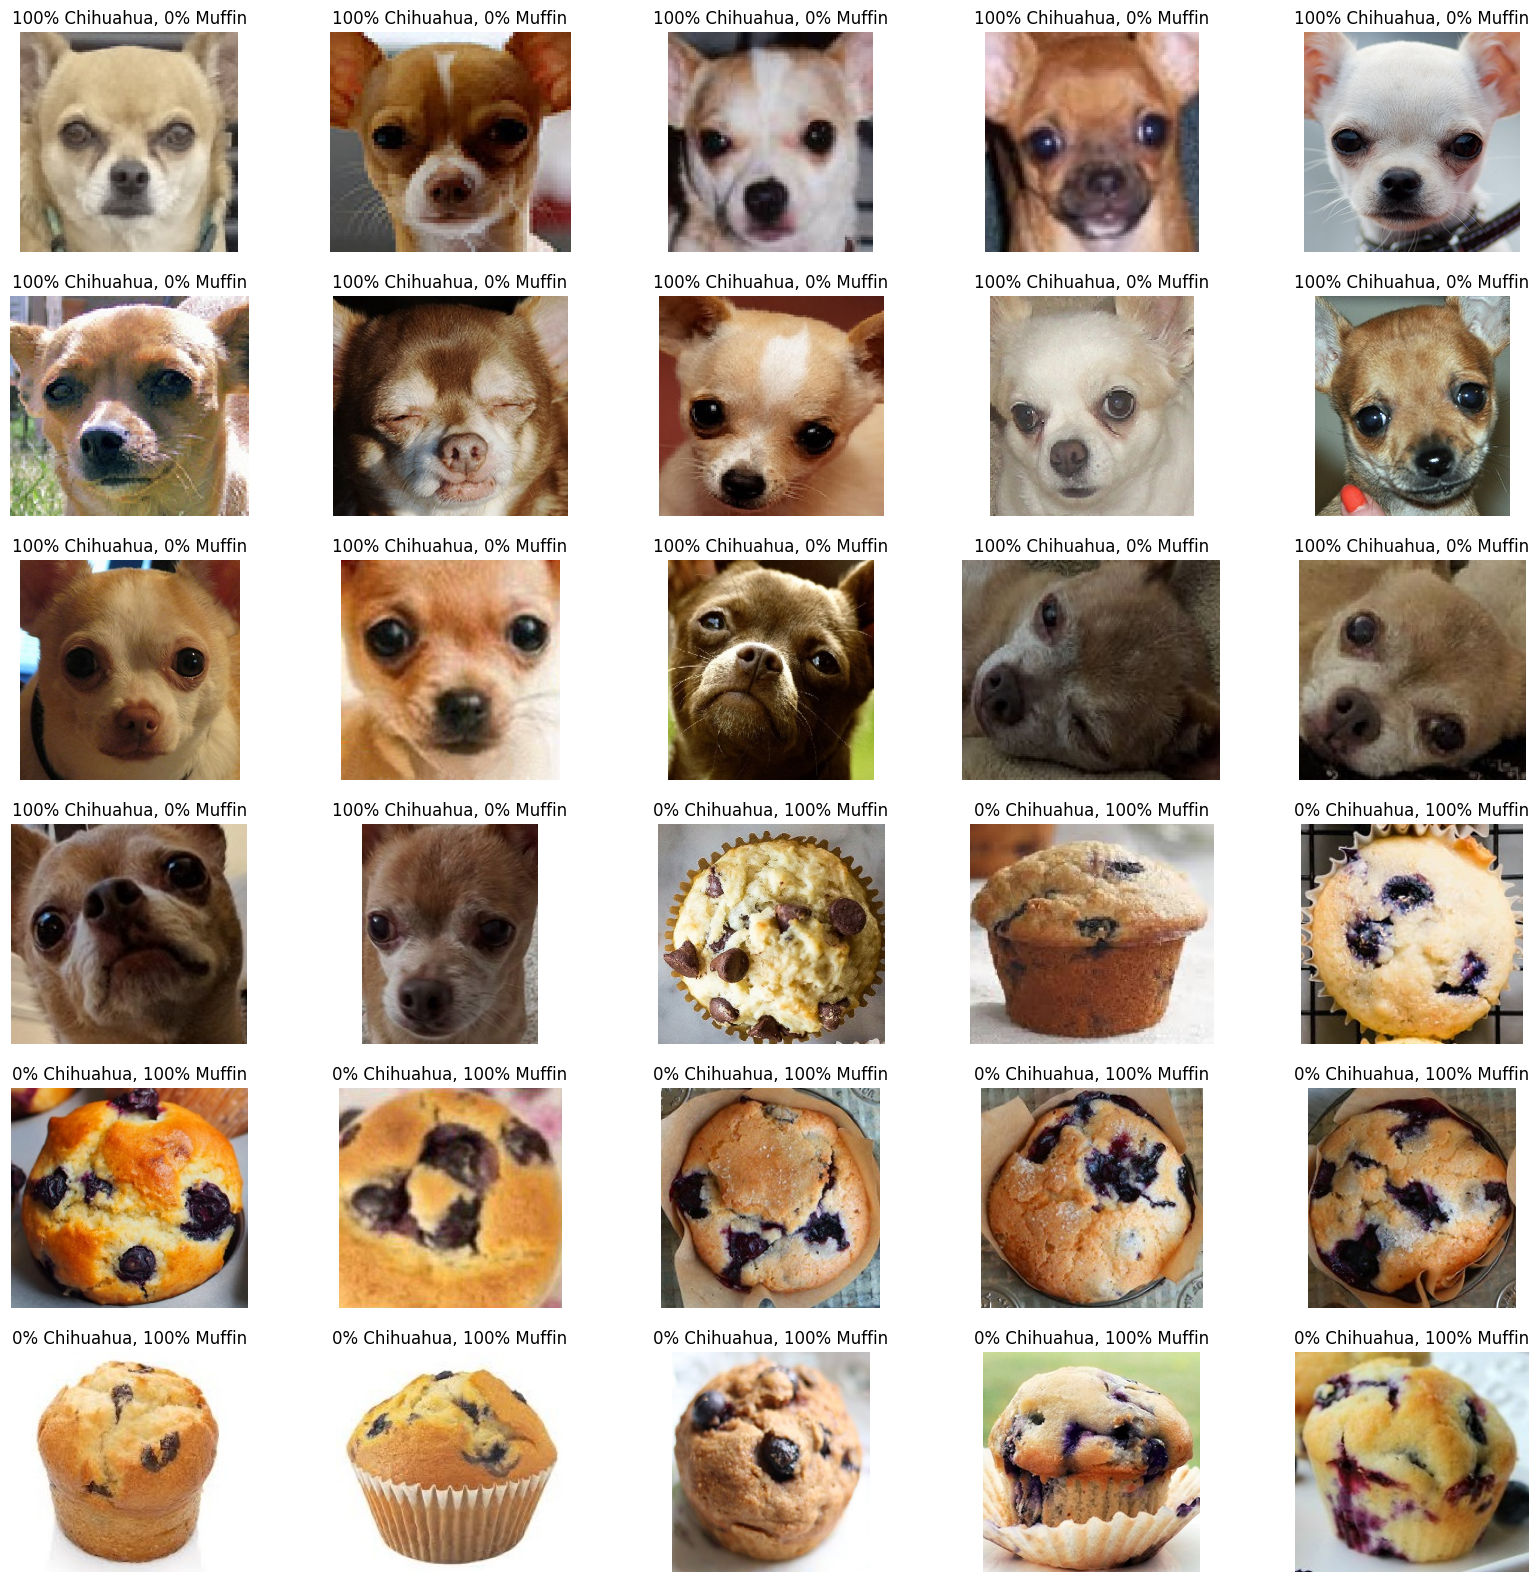

In [15]:
from glob import glob
from math import floor
from PIL import Image

# Evaluate the model on validation images
validation_img_paths = glob("data/validation/**/*.jpg", recursive=True)
images = [Image.open(img_path) for img_path in validation_img_paths]
validation_batch = torch.stack([validation_transforms(img).to(device) for img in images])
pred_logits_tensor = model(validation_batch)
pred_probs = nn.functional.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()

# Visualize predictions
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
for i, img in enumerate(images):
    ax = axs[floor(i/5)][i % 5]
    ax.axis('off')
    ax.set_title("{:.0f}% Chihuahua, {:.0f}% Muffin".format(100*pred_probs[i,0], 100*pred_probs[i,1]), fontsize=12)
    ax.imshow(img)
plt.show()

**Consider:** How accurate was your model? How confident were its predictions? Does it make clear-cut decisions?

## Congratulations! You've successfully trained a neural network!

# III.  Can You Do Better?

Now that we've shown you how to train a neural network, can you improve the validation accuracy by tweaking the parameters? **We challenge you to reach 100% accuracy!**

Some parameters to play with:
- Number of epochs
- The learning rate "lr" parameter in the optimizer
- The type of optimizer (https://pytorch.org/docs/stable/optim.html)
- Number of layers and layer dimensions
- Image size
- Data augmentation transforms (https://pytorch.org/docs/stable/torchvision/transforms.html)

# Special Thanks!

Credit for the original idea and code goes to [DeepSense.ai](https://deepsense.ai/keras-vs-pytorch-avp-transfer-learning/)!
We've modified it significantly to cater to this workshop, and boost the visual appeal.

This tutorial was created through hard work and love by Jing Zhao, Dylan Wang, Jason Do, Jason Jiang, and Andrew Jong.